Описание проекта. Цели и задачи

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 
Нужно выявить определяющие успешность игры закономерности. 

Цель: сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Задачи:
1. Узнать, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
2. Посмотретьак менялись продажи по платформам. Выберать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
3. Взять данные за соответствующий актуальный период. Актуальный период определяется самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
4. Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
5. Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
6. Оценить, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.
7. Соотнести выводы с продажами игр на других платформах.
8. Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
9. Определить для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5). Опишисать различия в долях продаж.
10. Определить для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5). Пояснить разницу.
11. Выяснить, влияет ли рейтинг ESRB на продажи в отдельном регионе?
12. Проверить гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
13. Проверить гипотезу: Средние пользовательские рейтинги жанров Action и Sports разные.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
display(data.head(20))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


1. Предобработка данных

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
display(data.isna().sum())

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Большое количество пропусков в столбцах оценки критиков, оценки пользователей, рейтинг. Можно было бы заполнить их медианным значением по названию игры, но мне показалось это не правильным, т.к. это субьективная оценка от отдельного человека и мы не можем знать наверняка, на сколько зашла человеку игра. А усредняя данные мы можем изменить их актуальность.

In [6]:
#приведем названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()

In [7]:
#имена и жанры тоже приведу к нижнему регистру
data['name'] = data['name'].str.lower()
data['genre'] = data['genre'].str.lower()

In [8]:
display(data.head(20))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,Wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,NES,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,Wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,Wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,GB,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,GB,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,new super mario bros.,DS,2006.0,platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,wii play,Wii,2006.0,misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,new super mario bros. wii,Wii,2009.0,platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,duck hunt,NES,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [9]:
data.duplicated().sum()

0

In [10]:
data[data[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,madden nfl 13,PS3,2012.0,sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,madden nfl 13,PS3,2012.0,sports,0.00,0.01,0.00,0.00,83.0,5.5,E


In [11]:
data.drop(index = [659, 14244, 16230]).reset_index(drop=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,Wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,NES,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,Wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,Wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,GB,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16707,samurai warriors: sanada maru,PS3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16708,lma manager 2007,X360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16709,haitaka no psychedelica,PSV,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16710,spirits & spells,GBA,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [12]:
data.isnull().sum().sort_values(ascending = False) / data.shape[0] * 100

critic_score       51.319174
rating             40.478612
user_score         40.089740
year_of_release     1.609333
name                0.011965
genre               0.011965
platform            0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
dtype: float64

можно удалить строки с пропусками в столбцах: имя, жанр, год релиза
рейтинг и оценки рассмотрим ближе в дальнейшем

In [13]:
data = data.dropna(subset=('year_of_release', 'name', 'genre'))

In [14]:
data.isnull().sum().sort_values(ascending = False) / data.shape[0] * 100

critic_score       51.453418
rating             40.598395
user_score         40.166626
name                0.000000
platform            0.000000
year_of_release     0.000000
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
dtype: float64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [16]:
#приведу year_of_release к типу int
data['year_of_release'] = data['year_of_release'].astype('int')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [18]:
#обработаю колонку user_score
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Есть рейтинг от пользователей 0, поэтому Nan нет смысла заменять на 0., можно поменять на -1 или вообще не трогать. Я предпочту не трогать.
Так же есть странное значение tbd, которое означает "будет уточнено", рассмотрим его ближе

In [19]:
display(data[data['user_score'] == 'tbd'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,zumba fitness,Wii,2010,sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,namco museum: 50th anniversary,PS2,2005,misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,zumba fitness 2,Wii,2011,sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,udraw studio,Wii,2010,misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,just dance kids,Wii,2010,misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,planet monsters,GBA,2001,action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,bust-a-move 3000,GC,2003,puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,mega brain boost,DS,2008,puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,plushees,DS,2008,simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [20]:
display(data[data['user_score'] == 'tbd']['user_score'].count())

2376

Количество tbd  слишком велико чтобы его игнорировать, заменю его на Nan

In [21]:
data.loc[data['user_score'] == 'tbd','user_score'] = np.nan

In [22]:
#приведу user_score к типу float64
data['user_score'] = data['user_score'].astype('float')

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [24]:
display(data[data['user_score'] == 'tbd']['user_score'].count())

0

In [25]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [26]:
# оценки критиков приведу к целочисленному формату, для этого заменим NaN на 0
data['critic_score'] = data['critic_score'].fillna(0)
data['critic_score'] = data['critic_score'].astype('int')

In [27]:
data['critic_score'].unique()

array([76,  0, 82, 80, 89, 58, 87, 91, 61, 97, 95, 77, 88, 83, 94, 93, 85,
       86, 98, 96, 90, 84, 73, 74, 78, 92, 71, 72, 68, 62, 49, 67, 81, 66,
       56, 79, 70, 59, 64, 75, 60, 63, 69, 50, 25, 42, 44, 55, 48, 57, 29,
       47, 65, 54, 20, 53, 37, 38, 33, 52, 30, 32, 43, 45, 51, 40, 46, 39,
       34, 41, 36, 31, 27, 35, 26, 19, 28, 23, 24, 21, 17, 13])

In [28]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,7463.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,33.494405,7.126330
std,5.875525,0.818378,0.506716,0.311100,0.188005,35.821558,1.499447
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,70.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


In [29]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,E
1,super mario bros.,NES,1985,platform,29.08,3.58,6.81,0.77,0,NaN,NaN
2,mario kart wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,E
3,wii sports resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80,8.0,E
4,pokemon red/pokemon blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,0,NaN,NaN
5,tetris,GB,1989,puzzle,23.20,2.26,4.22,0.58,0,NaN,NaN
6,new super mario bros.,DS,2006,platform,11.28,9.14,6.50,2.88,89,8.5,E
7,wii play,Wii,2006,misc,13.96,9.18,2.93,2.84,58,6.6,E
8,new super mario bros. wii,Wii,2009,platform,14.44,6.94,4.70,2.24,87,8.4,E
9,duck hunt,NES,1984,shooter,26.93,0.63,0.28,0.47,0,NaN,NaN


In [30]:
#добавлю столбец с суммарными продажами
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.6+ MB


In [32]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,super mario bros.,NES,1985,platform,29.08,3.58,6.81,0.77,0,NaN,NaN,40.24
2,mario kart wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,wii sports resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,0,NaN,NaN,31.38
5,tetris,GB,1989,puzzle,23.20,2.26,4.22,0.58,0,NaN,NaN,30.26
6,new super mario bros.,DS,2006,platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,wii play,Wii,2006,misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,new super mario bros. wii,Wii,2009,platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,duck hunt,NES,1984,shooter,26.93,0.63,0.28,0.47,0,NaN,NaN,28.31


In [33]:
data['platform'].nunique()

31

In [34]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

На первый взгляд кажется что в назаниях платформ есть неявные дубликаты, но в процессе гугления сстало понятно что PS и PC, DS и DS - разные платформы. Оставляем этот столбец без изменений

In [35]:
data['rating'] = data['rating'].fillna('Unknown')
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,super mario bros.,NES,1985,platform,29.08,3.58,6.81,0.77,0,NaN,Unknown,40.24
2,mario kart wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,wii sports resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,0,NaN,Unknown,31.38
5,tetris,GB,1989,puzzle,23.20,2.26,4.22,0.58,0,NaN,Unknown,30.26
6,new super mario bros.,DS,2006,platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,wii play,Wii,2006,misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,new super mario bros. wii,Wii,2009,platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,duck hunt,NES,1984,shooter,26.93,0.63,0.28,0.47,0,NaN,Unknown,28.31


2. Исследовательский анализ данных

In [36]:
#посмотрю сколько игр выпускалось в разные годы
data.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

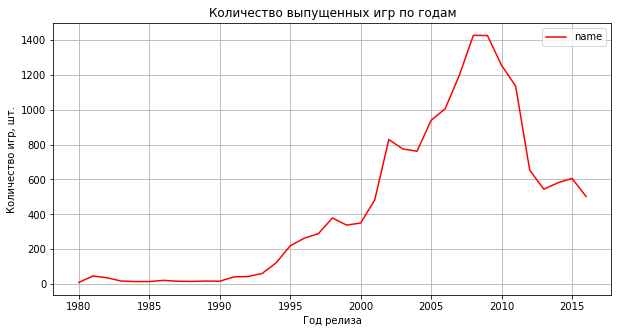

In [37]:
data.groupby('year_of_release')['name'].count().plot(kind='line', 
                                                     color='red', 
                                                     figsize=(10, 5), 
                                                     grid=True,
                                                    title='Количество выпущенных игр по годам',
                                                    ylabel='Количество игр, шт.',
                                                    xlabel='Год релиза').legend();

самые "плодотворные" года 2006-2011

In [38]:
data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

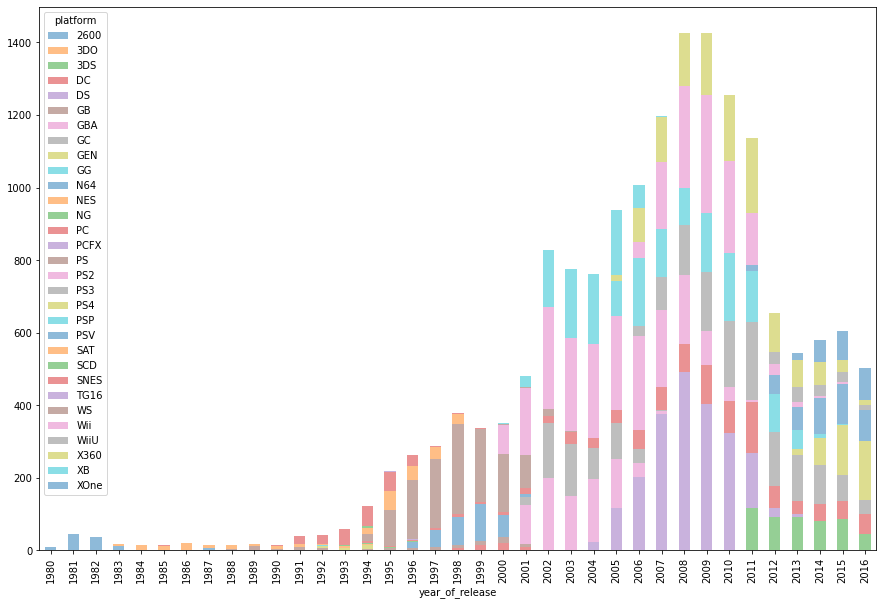

In [39]:
data.pivot_table(index='platform',
              columns='year_of_release',
              values='name',
              aggfunc='count').T.plot(kind='bar',stacked=True, figsize=(15,10), alpha=0.5);

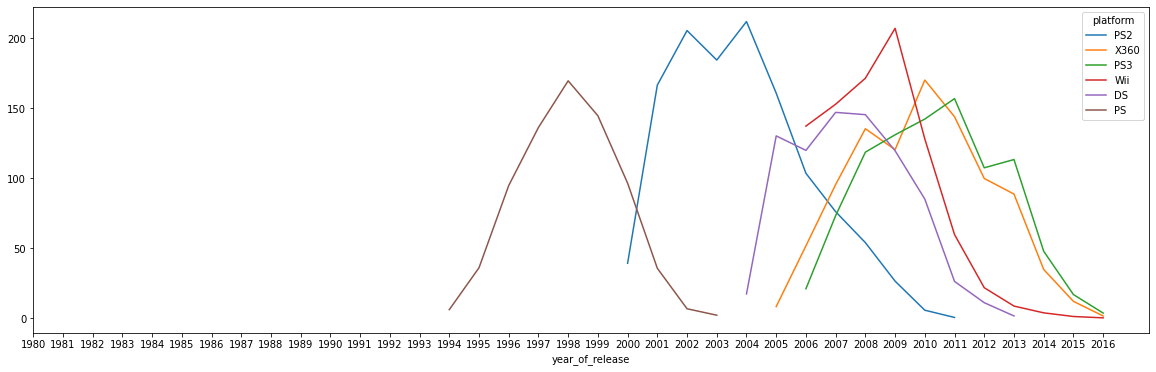

In [40]:
top_6_sales = data.pivot_table(
    index = 'year_of_release', 
    columns = 'platform',
    values = 'total_sales', 
    aggfunc = 'sum')
top_6_sales = top_6_sales[['PS2', 'X360','PS3','Wii', 'DS', 'PS']]

top_6_sales.plot(xticks=top_6_sales.index,figsize=(20,6));

исходя из 2х графиков выше можно сделать вывод, что платформы существуют в течение +- 10 лет и с 2012 года наблюдается снижение количества продаж, возможно это нормальное состояние рынка после того, как был технологический бум с 2002 года. 
Поэтому, я бы взяла для дальнейших исследований данные за последние 5 лет ( с 2012 года), они выглядят наиболее приближенными к реальности 2017 года

In [41]:
data.query('year_of_release >= 2012').groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: total_sales, dtype: float64

Видно, что в новом периоде изменился список лидирующих платформ. Здесь можно выделить 5 с самыми крупными продажами

In [42]:
top_5_platforms = data.query('year_of_release >= 2012 & platform in ["PS4", "PS3", "X360", "3DS", "XOne"]')
display(top_5_platforms)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,PS3,2013,action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,grand theft auto v,X360,2013,action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,call of duty: black ops 3,PS4,2015,shooter,6.03,5.86,0.36,2.38,0,NaN,Unknown,14.63
33,pokemon x/pokemon y,3DS,2013,role-playing,5.28,4.19,4.35,0.78,0,NaN,Unknown,14.60
34,call of duty: black ops ii,PS3,2012,shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16672,metal gear solid v: the definitive experience,XOne,2016,action,0.01,0.00,0.00,0.00,0,NaN,M,0.01
16674,tsukigime ranko's longest day,PS3,2014,action,0.00,0.01,0.00,0.00,0,NaN,Unknown,0.01
16677,aikatsu stars! my special appeal,3DS,2016,action,0.00,0.00,0.01,0.00,0,NaN,Unknown,0.01
16691,dynasty warriors: eiketsuden,PS3,2016,action,0.00,0.00,0.01,0.00,0,NaN,Unknown,0.01


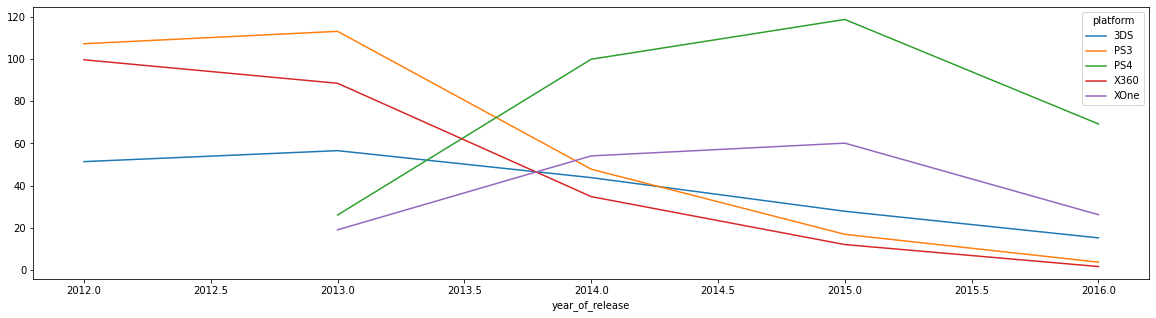

In [43]:
#Посмотрим, какие платформы лидируют по продажам, растут или падают
top_5_platforms.pivot_table(index='year_of_release',
                           columns='platform',
                           values='total_sales',
                           aggfunc='sum').plot(figsize=(20, 5));

самыми прибыльными выглядят платформы PS4 и XOne, остальные платформы еще с 2013 года начали падать в продажах и к концу 2016 года сходят на нет

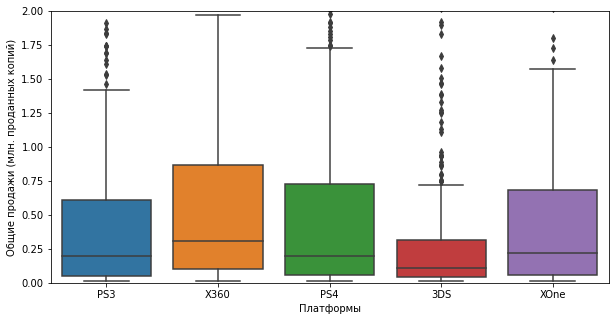

In [44]:
#построю ящик с усами по продажам игр на этих платформах

plt.figure(figsize=(10,5))
sns.boxplot(x='platform', y='total_sales', data=top_5_platforms).set_ylim(0, 2)
plt.ylabel('Общие продажи (млн. проданных копий)')
plt.xlabel('Платформы');

Медианные значения продаж смещены к нулю – получается на всех платформах выходит много игр с небольшими продажами. При этом везде есть игры, продажи которых превышают обычные значения.

In [45]:
top_5_platforms.groupby('platform')['name'].nunique()

platform
3DS     396
PS3     492
PS4     392
X360    292
XOne    247
Name: name, dtype: int64

посмотрим как влияют на продажи внутри самой популярной платформы PS4 отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами

In [46]:
#для удобства создадим переменную
ps4_sales = top_5_platforms.loc[top_5_platforms['platform'] == 'PS4']
ps4_sales = ps4_sales.query('critic_score != 0')

In [47]:
#посмотрим оценки по платформе
ps4_sales.groupby('platform')[['user_score', 'critic_score']].agg('mean').round(1)

,user_score,critic_score
platform,,
PS4,6.7,72.1


Оценки пользователей и критиков отличаются, но не сильно. 

Корреляция между отзывами пользователей и продажами: -0.03362497596528878


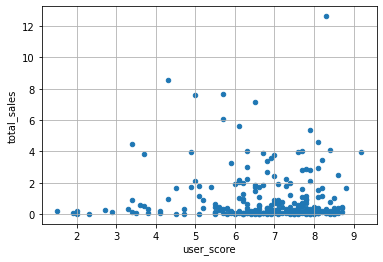

In [48]:
#посчитаем корреляцию между отзывами и продажами, построим диаграмму рассеяния
print('Корреляция между отзывами пользователей и продажами:', ps4_sales['user_score'].corr(ps4_sales['total_sales']))
ps4_sales.plot(x='user_score', y='total_sales', kind='scatter', grid=True);

Связи между отзывами пользователей и продажами не наблюдается

Корреляция между отзывами критиков и продажами: 0.40656790206178095


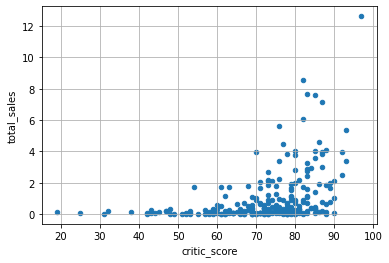

In [49]:
print('Корреляция между отзывами критиков и продажами:', ps4_sales['critic_score'].corr(ps4_sales['total_sales']))
ps4_sales.plot(x='critic_score', y='total_sales', kind='scatter', grid=True);

По графику можно сказать, что там, где были высокие оценки критиков были и высокие продажи, коэффициент Пирсона в 0,40656790206178095 говорит нам о том, что связь есть, но не слишком сильная. Выходит, что высокие оценки критиков поднимают уровень продаж, но не всегда


соотнесем выводы с продажами игр на других платформах

/tmp/ipykernel_188/3528954915.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(data1, ax=ax)


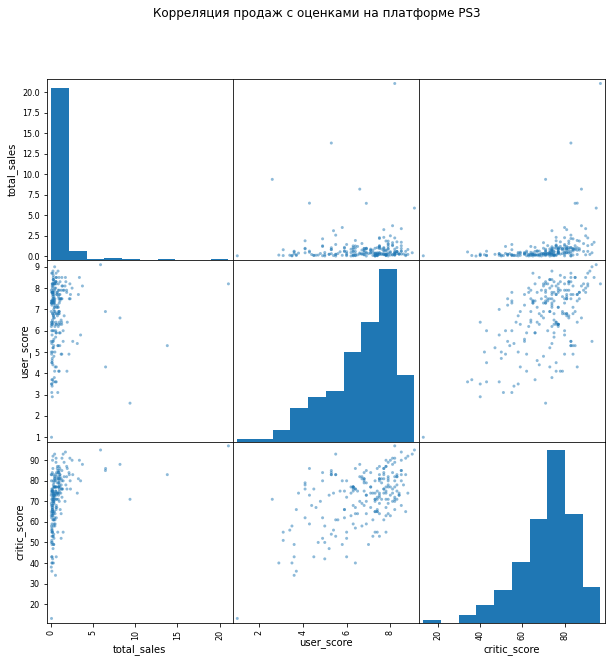

,total_sales,user_score,critic_score
total_sales,1.000000,0.003227,0.331497
user_score,0.003227,1.000000,0.539456
critic_score,0.331497,0.539456,1.000000


/tmp/ipykernel_188/3528954915.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(data1, ax=ax)


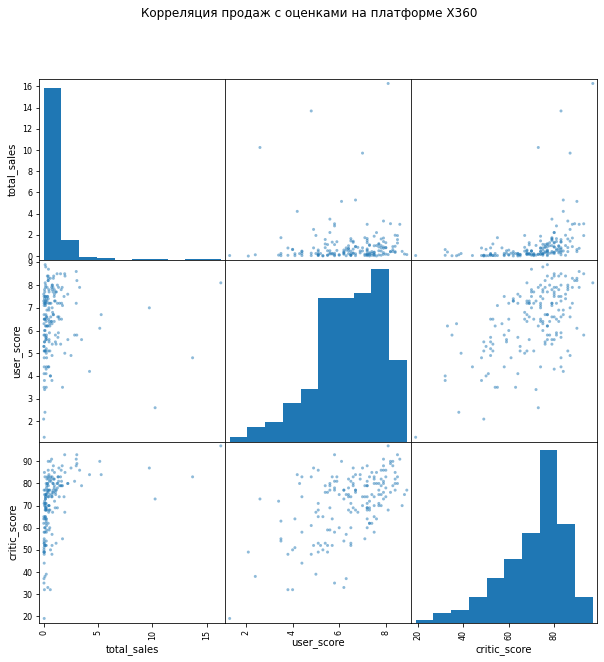

,total_sales,user_score,critic_score
total_sales,1.000000,-0.002014,0.360573
user_score,-0.002014,1.000000,0.557352
critic_score,0.360573,0.557352,1.000000


/tmp/ipykernel_188/3528954915.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(data1, ax=ax)


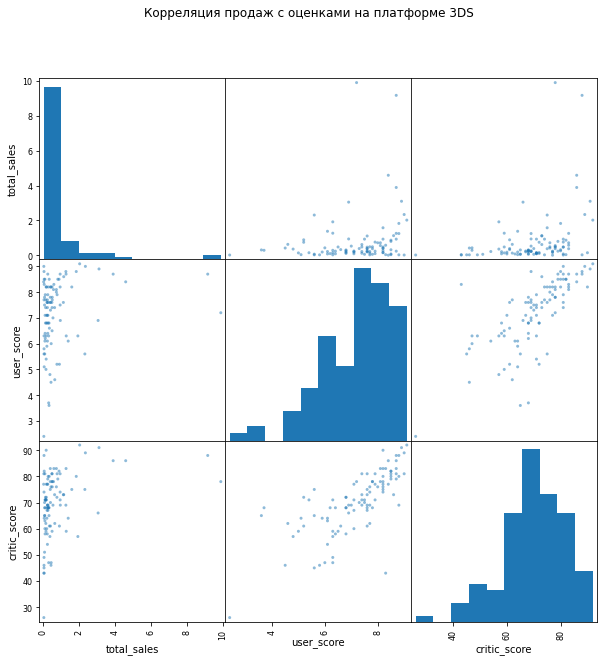

,total_sales,user_score,critic_score
total_sales,1.000000,0.201813,0.320803
user_score,0.201813,1.000000,0.722762
critic_score,0.320803,0.722762,1.000000


/tmp/ipykernel_188/3528954915.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(data1, ax=ax)


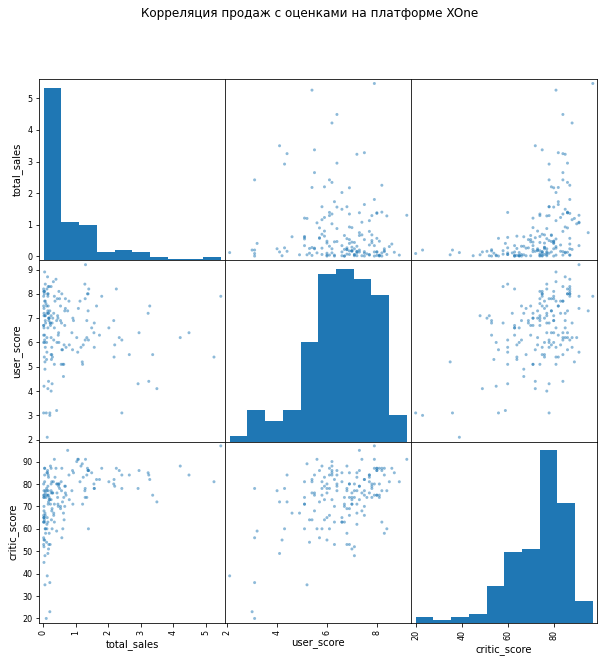

,total_sales,user_score,critic_score
total_sales,1.000000,-0.094003,0.416998
user_score,-0.094003,1.000000,0.472462
critic_score,0.416998,0.472462,1.000000


In [50]:
platform_list = ['PS3', 'X360', '3DS', 'XOne']

for platform in platform_list:
    data1 = top_5_platforms.query('platform == @platform and critic_score != 0')[['total_sales','user_score', 'critic_score']]
    
    fig, ax = plt.subplots(figsize = (10,10))
    pd.plotting.scatter_matrix(data1, ax=ax)
    fig.suptitle(f'Корреляция продаж с оценками на платформе {platform}')
    plt.show()  
    
    display(top_5_platforms.query('platform == @platform and critic_score != 0')[['total_sales','user_score', 'critic_score']].agg('corr'))

На всех платформах зависимость между оценками пользователей и продажами стремится к нулю или имеет отрицательное значение. Связь между оценками критиков и продажами не сильна, но оценки критиков влияют на продажи чуть больше.

посмотрим общее распределение игр по жанрам. Выделим самый прибыльный жанр. Какие жанры с высокими и низкими продажами?

In [51]:
top_5_platforms['genre'].value_counts()

action          657
role-playing    219
sports          203
shooter         180
adventure       133
misc            116
fighting         83
racing           82
platform         53
simulation       49
strategy         30
puzzle           15
Name: genre, dtype: int64

По общему распределению игр по жанрам безусловным лидером является жанр action. 
Наименьшее количество игр в жанре puzzle.

(-10.0, 120.0)

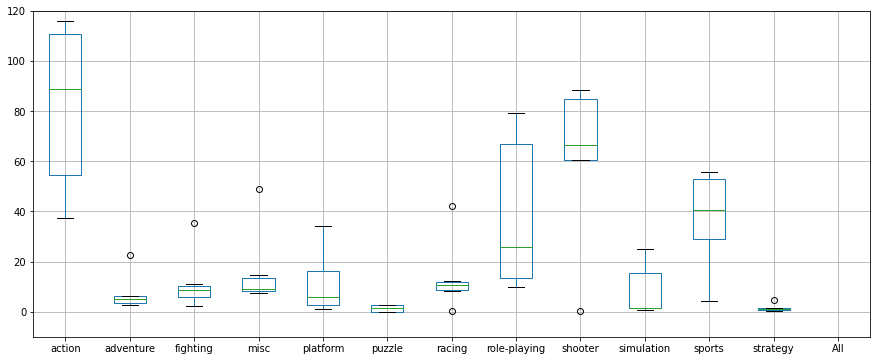

In [52]:
#посмотрим распределение количества продаж жанров по платформам
top_5_platforms.pivot_table(index = 'platform',
    columns = 'genre',
    values = 'total_sales',
    aggfunc='sum',
    margins=True
).boxplot(figsize=(15, 6)).set_ylim(-10, 120)

самые популярные жанры action, shooter, sports. При том, что у action высокое значение медианы, что говорит о большом количестве хорошо продаваемых продуктах, хотя и есть проекты с низкими продажами. 
У shooter медиана смещена к нижней границе, но все равно это достаточно высокие показатели продаж относительно всех жанров. 
В жанре sports нижний ус приближается к нулю, хотя медиана имеет хорошее значение. Это говорит о то, что в этом жанре есть провальные проекты и их достаточно много.
наименее популярные puzzle, strategy -  у них все распределение очень близко подходит к 0.

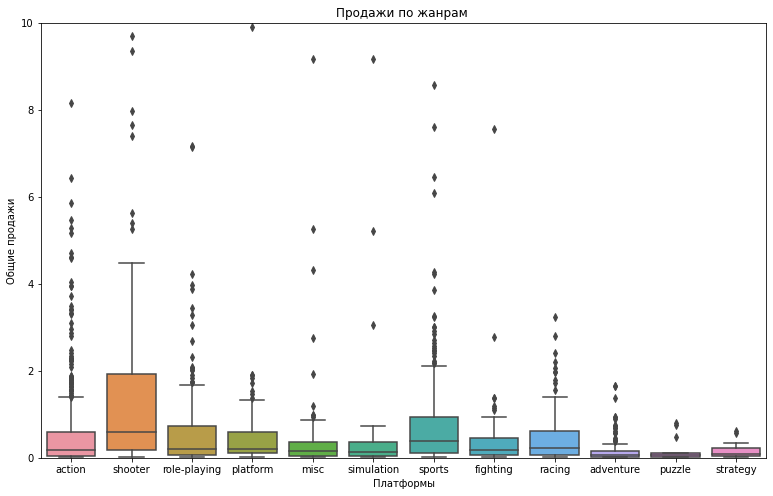

In [53]:
#Код ревьюера
plt.figure(figsize=(13, 8))
(sns.boxplot(data = top_5_platforms, y = 'total_sales', x='genre')
    .set(title = 'Продажи по жанрам ', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 10)))

plt.show()

Медианные значения продаж смещены к нижнему краю – то есть на всех платформах выходит много игр с относительно небольшими продажами. При этом везде есть небольшое количество бестселлеров, продажи которых могут многократно превышать обычные значения.
Посмотрим как обстоят дела на каждой платформе:

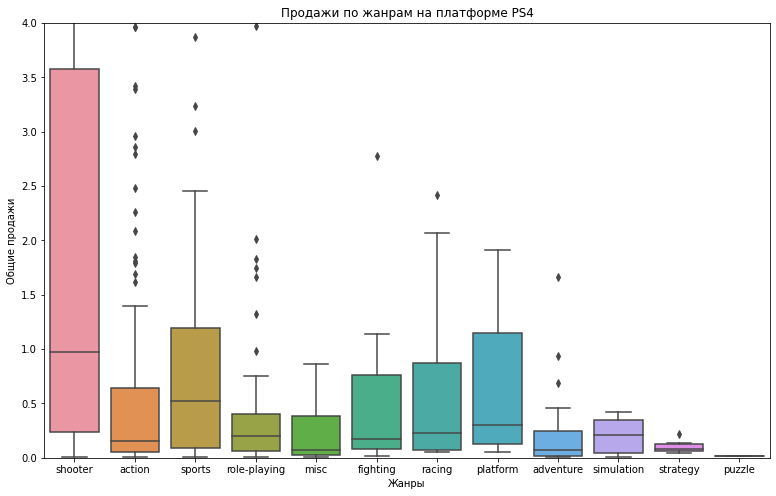

In [54]:
plt.figure(figsize=(13, 8))
(sns.boxplot(data = top_5_platforms.query('platform == "PS4"'), y = 'total_sales', x='genre')
    .set(title = 'Продажи по жанрам на платформе PS4', xlabel = 'Жанры', ylabel = 'Общие продажи', ylim=(0, 4)))

plt.show()

у PS4 наиболее прибыльный жанр shooter, продажи доходят и до 8 млн копий, но медиана находится в районе 1млн копий. Так же жанр sports находится около 500 тыс проданных копий, У остальных жанров медианы продаж достаточно низкие. 

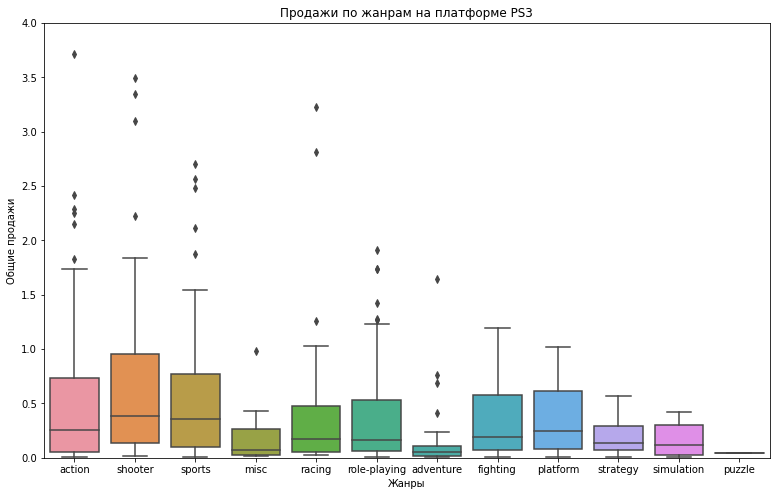

In [55]:
plt.figure(figsize=(13, 8))
(sns.boxplot(data = top_5_platforms.query('platform == "PS3"'), y = 'total_sales', x='genre')
    .set(title = 'Продажи по жанрам на платформе PS3', xlabel = 'Жанры', ylabel = 'Общие продажи', ylim=(0, 4)))

plt.show()

На платформе PS3 медиана продаж от 300 тыс проданных копий и ниже. Самые прибыльные жанры здесь shooter, action, sports

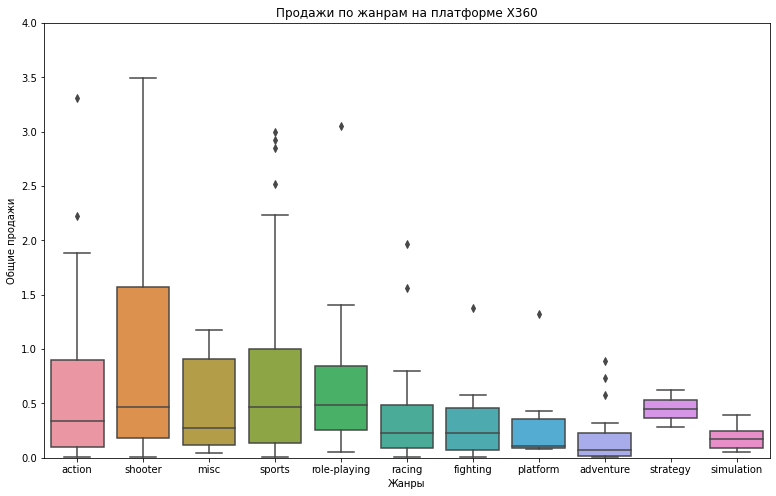

In [56]:
plt.figure(figsize=(13, 8))
(sns.boxplot(data = top_5_platforms.query('platform == "X360"'), y = 'total_sales', x='genre')
    .set(title = 'Продажи по жанрам на платформе X360', xlabel = 'Жанры', ylabel = 'Общие продажи', ylim=(0, 4)))

plt.show()

на платформе X360 игры в жанрах shooter, action, sports, misk, role-playing, strategy, rasing, fighting имеют медианные значения в диапазоне от 500 до 300 тыс. проданных копий

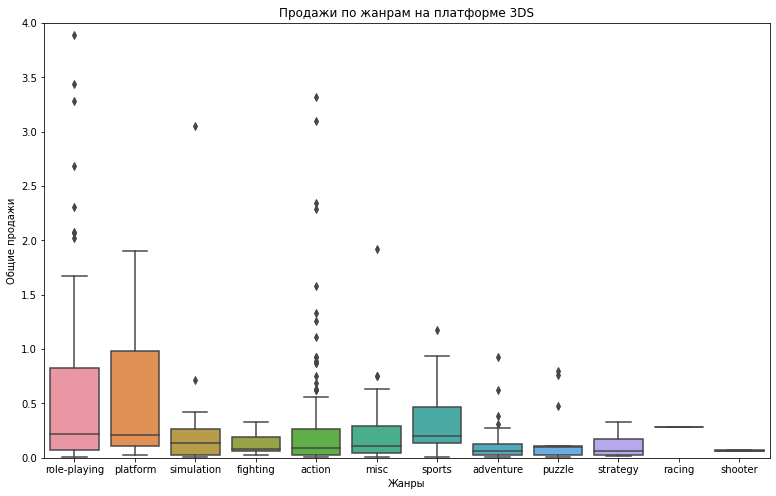

In [57]:
plt.figure(figsize=(13, 8))
(sns.boxplot(data = top_5_platforms.query('platform == "3DS"'), y = 'total_sales', x='genre')
    .set(title = 'Продажи по жанрам на платформе 3DS', xlabel = 'Жанры', ylabel = 'Общие продажи', ylim=(0, 4)))

plt.show()

На платформе 3DS игры в жанре role-playing, platform и sports самые продаваемые, медиана продаж в районе 250 тыс копий

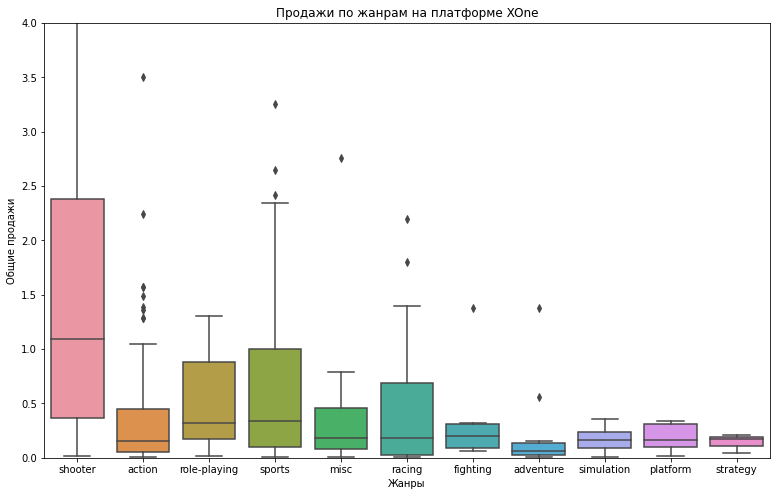

In [58]:
plt.figure(figsize=(13, 8))
(sns.boxplot(data = top_5_platforms.query('platform == "XOne"'), y = 'total_sales', x='genre')
    .set(title = 'Продажи по жанрам на платформе XOne', xlabel = 'Жанры', ylabel = 'Общие продажи', ylim=(0, 4)))

plt.show()

на платформе XOne высокие продажи у игр в жанре shooter, медианное количество проданных копий 1,1 млн. Остальные жанры имеют медианные значения менее 400 тыс проданных копий

4 Портрет пользователя каждого региона

популярные платформы топ-5 для каждого региона. 

In [59]:
top_5_platforms.pivot_table(
    index = 'platform',
    values = ['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc =  'sum'
).apply(lambda col: col / col.sum(), 
    axis=0
).style.format("{:.1%}")

,eu_sales,jp_sales,na_sales
platform,,,
3DS,10.2%,62.3%,11.0%
PS3,25.6%,25.0%,20.7%
PS4,33.9%,11.3%,21.7%
X360,17.9%,1.1%,28.0%
XOne,12.4%,0.2%,18.6%


Европейцы предпочитают PlayStation, японцы отдают предпочтение 3DS, а 28% американцев предпочтут X360, но 20,7% и 21,7% пользователей северной америки выбрали PlayStation 

популярные жанры топ-5 для каждого региона

In [60]:
top_5_platforms.pivot_table(
    index = 'genre',
    values = ['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc =  'sum'
).apply(lambda col: col / col.sum(), 
    axis=0
).style.format("{:.1%}")

,eu_sales,jp_sales,na_sales
genre,,,
action,32.8%,29.1%,30.7%
adventure,1.9%,3.0%,1.6%
fighting,2.1%,5.3%,3.1%
misc,3.5%,4.7%,4.6%
platform,3.0%,3.5%,2.7%
puzzle,0.2%,0.9%,0.1%
racing,5.4%,0.8%,2.6%
role-playing,9.1%,35.1%,10.3%
shooter,24.7%,5.4%,27.3%


в Японии популярны игры в жанре role-playing и action. Так же любовь к жанру action наблюдается на европейском и американском ранке, однако жанр role-playing в этих странах не особо популярен, shooter - вот что действительно нравится

влияет ли рейтинг ESRB на продажи в отдельном регионе

In [61]:
top_5_platforms.pivot_table(
    index = 'rating',
    values = ['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc =  'sum'
).apply(lambda col: col / col.sum(), 
    axis=0
).style.format("{:.1%}")

,eu_sales,jp_sales,na_sales
rating,,,
E,22.0%,14.2%,18.7%
E10+,8.2%,3.4%,9.6%
M,41.4%,13.5%,42.8%
T,10.0%,13.8%,11.2%
Unknown,18.3%,55.1%,17.8%


E - «Для всех»: Содержание вполне подходит для всех возрастов.

E10+ - «Для всех от 10 лет и старше»

M - «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет.

T - «Подросткам»: Игра подходит для лиц от 13 лет.

Самые большие продажи имеют игры для взрослых в Европе и Америке, так же в этих регионах достаточно популярны игры, подходящие для всех возрастов.

В Японии игры подходящие для всех, игры для взрослых и для подростков имеют примерно одинаковый уровень востребованности. Но так как рейтинг ESRB предназначен для маркировки игр для США и Канады и для других регионов не обязателен для заполнения, то в Японии больше 55,1% игр, не маркируются по возрастной категории

Игры в возрастной категории "от 10 лет и старше" имеют достаточно низкие продажи во всех регионах. Возможно потому, что это немногочисленная категория, ведь разрыв с "Подростками" всего 3 года. Но стоит отметить, что в Европе и Америке спрос низкий и на игры для тинейджеров.


### Проверка гипотез

Нужно проверить гипотезу: средние пользовательские рейтинги платформ XOne	и PC одинаковые

Для этого создадим переменные по этим платформам (данные возьмем начиная с 2012 года) и сформируем нулевую и альтернативную гипотезу.

Н 0: средние пользовательские рейтинги платформ XOne и PC одинаковые 

H А: пользовательские рейтинги платформ XOne и PC отличаются

In [62]:
data1= data.query('year_of_release >= 2012')

In [63]:
xone = data1.query('platform == "XOne"').user_score.dropna().reset_index(drop=True)
pc = data1.query('platform == "PC"').user_score.dropna().reset_index(drop=True)

In [64]:
alpha = .05
results = st.ttest_ind(xone, pc, equal_var=False)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


In [65]:
action = data1.query('genre == "action"').user_score.dropna().reset_index(drop=True)
sports = data1.query('genre == "sports"').user_score.dropna().reset_index(drop=True)

Нужно проверить гипотезу: Средние пользовательские рейтинги жанров Action и Sports разные

Для этого создадим переменные по этим платформам (данные возьмем начиная с 2012 года) и сформируем нулевую и альтернативную гипотезу.

H 0: Средние пользовательские рейтинги жанров Action и Sports одинаковые

H А: Средние пользовательские рейтинги жанров Action и Sports разные

In [66]:
alpha = .05
results = st.ttest_ind(action, sports, equal_var=False)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  4.24307776572644e-20
Отвергаем нулевую гипотезу


### Общий вывод

   Подъем игровой индустрии начался в 90-е годы и достиг своего пика в 2010 году. Далее пошел спад. Думаю, это связано с бумом развития технологий. А начало снижения релизов на игровых приставках с 2011 года может быть обусловлено развитием игр на мобильных телефонах.
Самое большое количество релизов (> 1000 в год) было в 2006 – 2011 годах, а потом резко упало (до 653 релизов за 2012 год) и вышло на плато.

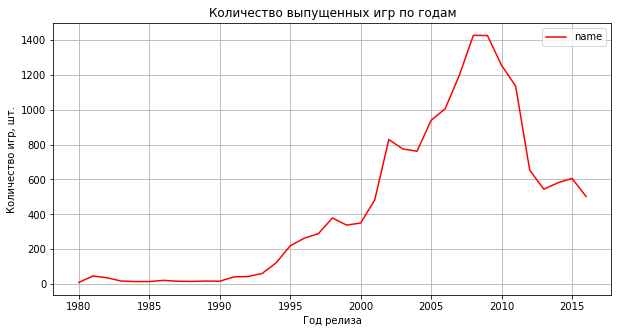

In [67]:
data.groupby('year_of_release')['name'].count().plot(kind='line', 
                                                     color='red', 
                                                     figsize=(10, 5), 
                                                     grid=True,
                                                    title='Количество выпущенных игр по годам',
                                                    ylabel='Количество игр, шт.',
                                                    xlabel='Год релиза').legend();

За весь исследуемый период можно выделить 6 платформ с наибольшими продажами: 

PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58

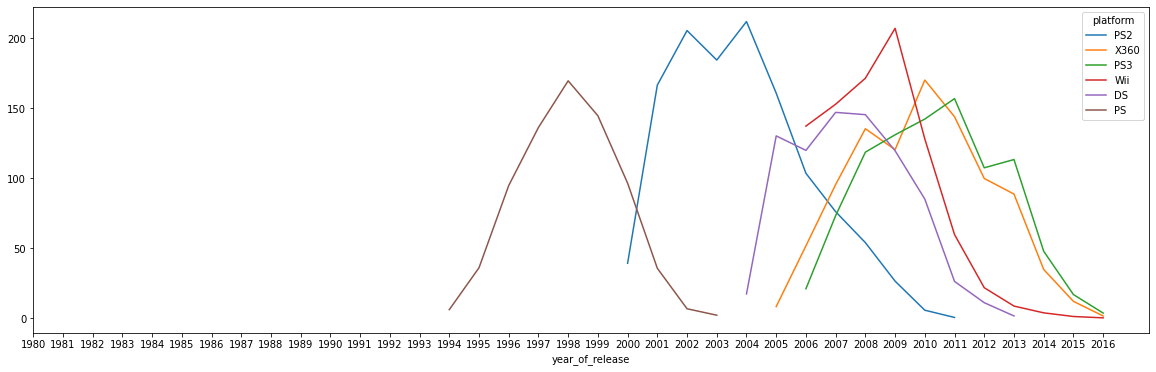

In [68]:
top_6_sales.plot(xticks=top_6_sales.index,figsize=(20,6));

в среднем платформа живет около 10 лет. На основании вышеизложенного получается, лучший период для дальнейших исследований это 5 лет с 2012 года. Это разумно, потому что этот период не имеет резких пиков, ближе по времени к периоду, на который нужно построить прогноз. 

Отбросили данные до 2012 года и у нас сформировались новые лидеры по продажам:
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32

    -  Платформа PS4 - абсолютный лидер. Самое высокое медианное значение из всех и самые высокие продажи на фоне остальных конкурентов, что говорит о высокой востребованности большинства игр, которые они выпускают.
    - у PS3 и X360 медианные значения смещены к нижней границе и получается, что у них относительно небольшие продажи, но есть и бестселлеры, продажи которых превышают обычные значения. 
    - XOne и 3DS, их показатели очень похожи, можно считать что они идут "ноздря в ноздрю" и по медианным значениям не сильно отстают от PS3 и X360, что говорит о хорошем качестве производимого продукта.
    - Но к 2016 года самыми «живыми» выглядят платформы PS4 и XOne, остальные платформы еще с 2013 года начали падать в продажах и к концу 2016 года сходят на нет. 



Зависимость продаж от оценок критиков и пользователей внутри самой популярной платформы PS4 

Корреляция между отзывами критиков и продажами: 0.40656790206178095


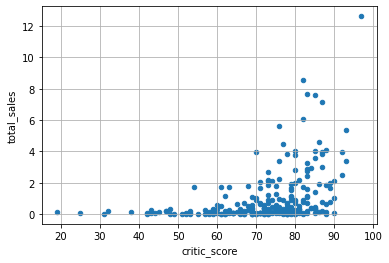

In [69]:
print('Корреляция между отзывами критиков и продажами:', ps4_sales['critic_score'].corr(ps4_sales['total_sales']))
ps4_sales.plot(x='critic_score', y='total_sales', kind='scatter', grid=True);

По графику можно сказать, что там, где были высокие оценки критиков были и высокие продажи, коэффициент Пирсона в 0,40656790206178095 говорит нам о том, что связь есть, но не слишком сильная. Выходит, что высокие оценки критиков поднимают уровень продаж, но не всегда.

Аналогичная ситуация наблюдается и у других платформ.

По общему распределению игр по жанрам безусловным лидером является жанр action (657 игр), это в 3 раза больше, чем у жанра, занявшего 2е место (role-playing    219 игр)
Наименьшее количество игр в жанре puzzle, выпущено всего 15 с 2012 года

Распределение количества продаж жанров по платформам определило, что самый популярный жанр как и прежде action где много хорошо продаваемых продуктов, и наименее популярные puzzle, strategy - уровень продаж в этих жанрах стремится к 0. 

- у PS4 наиболее прибыльный жанр shooter, продажи доходят и до 8 млн копий, но медиана находится в районе 1млн копий. Так же жанр sports находится около 500 тыс проданных копий, У остальных жанров медианы продаж достаточно низкие.
- На платформе PS3 медиана продаж от 300 тыс проданных копий и ниже. Самые прибыльные жанры здесь shooter, action, sports
- на платформе X360 игры в жанрах shooter, action, sports, misk, role-playing, strategy, rasing, fighting имеют медианные значения в диапазоне от 500 до 300 тыс. проданных копий
- На платформе 3DS игры в жанре role-playing, platform и sports самые продаваемые, медиана продаж в районе 250 тыс копий
- на платформе XOne высокие продажи у игр в жанре shooter, медианное количество проданных копий 1,1 млн. Остальные жанры имеют медианные значения менее 400 тыс проданных копий


   Популярные платформы топ-5 для каждого региона:
Европейцы предпочитают PlayStation, японцы отдают предпочтение 3DS, а 28% американцев предпочтут X360, но 20,7% и 21,7% пользователей Америки выбрали PlayStation

   Популярные жанры топ-5 для каждого региона:
в Японии популярны игры в жанре role-playing и action. Так же любовь к жанру action наблюдается на европейском и американском ранке, однако жанр role-playing в этих странах не особо популярен, shooter - вот что действительно нравится

   Влияние рейтинга ESRB на продажи в отдельном регионе:
Самые большие продажи у игр для взрослых в Европе и Америке, так же в этих регионах достаточно популярны игры, подходящие для всех возрастов.

В Японии игры подходящие для всех, игры для взрослых и для подростков имеют примерно одинаковый уровень востребованности. Но так как рейтинг ESRB предназначен для маркировки игр для США и Канады и для других регионов не обязателен для заполнения, то в Японии больше 55,1% игр, не маркируются по возрастной категории.

Игры в возрастной категории "от 10 лет и старше" имеют достаточно низкие продажи во всех регионах. Возможно потому, что это немногочисленная категория, ведь разрыв с "Подростками" всего 3 года. Но стоит отметить, что в Европе и Америке спрос низкий и на игры для тинейджеров.

При проверке гипотез была принята гипотеза о том, что пользовательские рейтинги платформ XOne и PC одинаковые.
и была отвергнута гипотеза, что средние пользовательские рейтинги жанров Action и Sports разные.